<a href="https://colab.research.google.com/github/orifelszer/CrimeData/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # ◊ú◊¢◊ë◊ï◊ì◊î ◊¢◊ù ◊†◊™◊ï◊†◊ô◊ù ◊ò◊ë◊ú◊ê◊ô◊ô◊ù
import matplotlib.pyplot as plt  # ◊ú◊î◊¶◊í◊™ ◊í◊®◊§◊ô◊ù
import seaborn as sns
import os
import zipfile


In [2]:

# ◊î◊ï◊®◊ì◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊û◊î-GitHub
!git clone https://github.com/orifelszer/CrimeData.git

# ◊î◊í◊ì◊®◊™ ◊î◊™◊ô◊ß◊ô◊ô◊î ◊ú◊ê◊ó◊® ◊î◊î◊ï◊®◊ì◊î
zip_folder = 'CrimeData'

# ◊î◊í◊ì◊®◊™ ◊†◊™◊ô◊ë◊ô◊ù ◊ô◊©◊ô◊®◊ô◊ù ◊ú◊©◊†◊ô ◊î◊ß◊ë◊¶◊ô◊ù
zip_files = [
    os.path.join(zip_folder, 'Clean_data_unsupervised_part1.zip'),
    os.path.join(zip_folder, 'Clean_data_unsupervised_part2.zip')
]

# ◊®◊©◊ô◊û◊î ◊ú◊©◊û◊ô◊®◊™ ◊†◊™◊ô◊ë◊ô ◊î◊ß◊ë◊¶◊ô◊ù ◊©◊†◊§◊®◊°◊ï
extracted_folders = []

# ◊§◊®◊ô◊°◊™ ◊ß◊ë◊¶◊ô ◊î-ZIP
for zip_file in zip_files:
    extract_path = zip_file.replace('.zip', '')  # ◊ô◊¶◊ô◊®◊™ ◊©◊ù ◊™◊ô◊ß◊ô◊ô◊î ◊ú◊§◊ô ◊©◊ù ◊î◊ß◊ï◊ë◊•

    # ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊î◊ß◊ï◊ë◊• ◊ß◊ô◊ô◊ù
    if os.path.exists(zip_file):
        # ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊î◊™◊ô◊ß◊ô◊ô◊î ◊õ◊ë◊® ◊†◊§◊®◊°◊î
        if not os.path.exists(extract_path):
            with zipfile.ZipFile(zip_file, 'r') as zip_ref:
                zip_ref.extractall(extract_path)
            print(f"Extracted: {zip_file} -> {extract_path}")
        else:
            print(f"Skipped: {zip_file} (Already extracted)")
    else:
        print(f"File not found: {zip_file}")

    extracted_folders.append(extract_path)

# ◊ê◊ô◊ó◊ï◊ì ◊ß◊ë◊¶◊ô CSV ◊©◊§◊ï◊®◊°◊ï
dataframes = []

for folder in extracted_folders:
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)
        if file_name.endswith('.csv'):
            df_temp = pd.read_csv(file_path)
            dataframes.append(df_temp)

# ◊ê◊ô◊ó◊ï◊ì ◊õ◊ú ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú◊û◊°◊í◊®◊™ ◊†◊™◊ï◊†◊ô◊ù ◊ê◊ó◊™
combined_df = pd.concat(dataframes, ignore_index=True)

# ◊î◊¶◊í◊™ ◊û◊°◊í◊®◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊ê◊ï◊ó◊ì◊™
print(f"Combined dataset contains {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")

Cloning into 'CrimeData'...
remote: Enumerating objects: 923, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 923 (delta 208), reused 150 (delta 150), pack-reused 678 (from 2)
Receiving objects: 100% (923/923), 300.00 MiB | 19.80 MiB/s, done.
Resolving deltas: 100% (490/490), done.
Updating files: 100% (34/34), done.
Extracted: CrimeData/Clean_data_unsupervised_part1.zip -> CrimeData/Clean_data_unsupervised_part1
Extracted: CrimeData/Clean_data_unsupervised_part2.zip -> CrimeData/Clean_data_unsupervised_part2
Combined dataset contains 1686927 rows and 19 columns.


In [3]:
combined_df

FictiveIDNumber  Year  Yeshuv  PoliceDistrict  PoliceMerhav  \
0                 219001  2020      50               3            19   
1                 645389  2020      70               3            18   
2                 159531  2020      21               6             8   
3                 867802  2020      33               2            15   
4                 430084  2020      33               2            15   
...                  ...   ...     ...             ...           ...   
1686922          1183189  2022      25               1            10   
1686923           404203  2022      33               2             5   
1686924           726876  2022      33               2            15   
1686925            26860  2022      33               2            15   
1686926          1143876  2022      80               6             8   

         PoliceStation  StatisticArea  StatisticGroup  StatisticType  \
0                   50           1236              10             14   
1                   63            704               3             97   
2                   15            194              10            121   
3                   40            246               4             27   
4                   35           1080               9              1   
...                ...            ...             ...            ...   
1686922             23            375               4             25   
1686923              2           1388               1             83   
1686924             35            915               4             27   
1686925             35            682               4             25   
1686926             36            460               4             27   

         Quarter_numeric   Quarter_sin   Quarter_cos  YeshuvCrimeRate  \
0                      1  1.000000e+00  6.123234e-17         0.596563   
1                      2  1.224647e-16 -1.000000e+00         0.625726   
2                      4 -2.449294e-16  1.000000e+00         0.266477   
3                      2  1.224647e-16 -1.000000e+00         2.364671   
4                      2  1.224647e-16 -1.000000e+00         2.364671   
...                  ...           ...           ...              ...   
1686922                4 -2.449294e-16  1.000000e+00         0.975553   
1686923                2  1.224647e-16 -1.000000e+00         2.364671   
1686924                3 -1.000000e+00 -1.836970e-16         2.364671   
1686925                3 -1.000000e+00 -1.836970e-16         2.364671   
1686926                1  1.000000e+00  6.123234e-17         2.490922   

         CrimeTrend  CrimeTrend_CrimeRate  StationCrimeRateAvg  \
0          4.523112              0.553678             0.601860   
1          4.523112              0.580618             0.631580   
2          4.523112              0.248758             0.214669   
3          4.523112              2.186987             2.424294   
4          4.523112              2.186987             2.340074   
...             ...                   ...                  ...   
1686922    5.523112              0.953929             0.992494   
1686923    5.523112              2.307743             2.424294   
1686924    5.523112              2.307743             2.340074   
1686925    5.523112              2.307743             2.340074   
1686926    5.523112              2.430786             2.554425   

         YeshuvHistoricalCrimeRate  StationsNearbyCount  CityOrMoshav_Moshav  
0                         0.596563              4.50001                False  
1                         0.625726              4.50001                False  
2                         0.266477              3.50001                 True  
3                         2.364671              2.00001                False  
4                         2.364671              2.00001                False  
...                            ...                  ...                  ...  
1686922                   0.975553              3.00001 

In [4]:
# ◊†◊ô◊ß◊ï◊ô ◊¢◊®◊õ◊ô◊ù ◊ó◊®◊ô◊í◊ô◊ù
combined_df = combined_df[(combined_df['YeshuvCrimeRate'] >= 0) & (combined_df['StationsNearbyCount'] >= 0)]

# ◊ß◊ô◊ë◊ï◊• ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú◊§◊ô ◊ô◊ô◊©◊ï◊ë
yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
    YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
    StationsNearbyAvg=('StationsNearbyCount', 'mean'),
    CrimeTrendAvg=('CrimeTrend', 'mean')
).reset_index()

In [5]:
from sklearn.ensemble import IsolationForest

# ◊î◊í◊ì◊®◊™ ◊î◊û◊ï◊ì◊ú ◊ï◊î◊õ◊†◊™ ◊î◊†◊™◊ï◊†◊ô◊ù
iso_forest = IsolationForest(contamination=0.05, random_state=42)
yeshuv_grouped['Anomaly'] = iso_forest.fit_predict(yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']])

# ◊ñ◊ô◊î◊ï◊ô ◊î◊ó◊®◊ô◊í◊ô◊ù
outliers = yeshuv_grouped[yeshuv_grouped['Anomaly'] == -1]
print("◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ó◊®◊ô◊í◊ô◊ù ◊©◊ñ◊ï◊î◊ï:", outliers)


◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ó◊®◊ô◊í◊ô◊ù ◊©◊ñ◊ï◊î◊ï:     Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  Anomaly
5        5            0.034149           0.000010       4.786579       -1
33      33            2.364671           1.998603       4.761460       -1
34      34            0.000845           4.500010       4.947420       -1
68      68            0.056971           4.000010       5.020835       -1
80      80            2.490922           3.500010       4.646094       -1


In [6]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
yeshuv_grouped['Anomaly_LOF'] = lof.fit_predict(yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']])


In [7]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.05, kernel='rbf')
yeshuv_grouped['Anomaly_SVM'] = svm.fit_predict(yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']])


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor




# ====== ◊©◊ú◊ë 1: ◊ñ◊ô◊î◊ï◊ô ◊ó◊®◊ô◊í◊ô◊ù ◊¢◊ù Isolation Forest ======
iso_forest = IsolationForest(contamination=0.05, random_state=42)
yeshuv_grouped['Anomaly_ISO'] = iso_forest.fit_predict(
    yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']]
)

# ◊°◊ô◊†◊ï◊ü ◊î◊ó◊®◊ô◊í◊ô◊ù ◊©◊†◊û◊¶◊ê◊ï
outliers_iso = yeshuv_grouped[yeshuv_grouped['Anomaly_ISO'] == -1]
print("üî¥ ◊ó◊®◊ô◊í◊ô◊ù ◊©◊ñ◊ï◊î◊ï ◊¢◊ú ◊ô◊ì◊ô Isolation Forest:")
print(outliers_iso)


# ====== ◊©◊ú◊ë 2: ◊ñ◊ô◊î◊ï◊ô ◊ó◊®◊ô◊í◊ô◊ù ◊¢◊ù Local Outlier Factor (LOF) ======



lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
yeshuv_grouped['Anomaly_LOF'] = lof.fit_predict(
    yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']]
)

# ◊°◊ô◊†◊ï◊ü ◊î◊ó◊®◊ô◊í◊ô◊ù ◊©◊†◊û◊¶◊ê◊ï ◊¢◊ù LOF
outliers_lof = yeshuv_grouped[yeshuv_grouped['Anomaly_LOF'] == -1]
print("\nüî¥ ◊ó◊®◊ô◊í◊ô◊ù ◊©◊ñ◊ï◊î◊ï ◊¢◊ú ◊ô◊ì◊ô Local Outlier Factor:")
print(outliers_lof)

üî¥ ◊ó◊®◊ô◊í◊ô◊ù ◊©◊ñ◊ï◊î◊ï ◊¢◊ú ◊ô◊ì◊ô Isolation Forest:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  Anomaly  \
5        5            0.034149           0.000010       4.786579       -1   
33      33            2.364671           1.998603       4.761460       -1   
34      34            0.000845           4.500010       4.947420       -1   
68      68            0.056971           4.000010       5.020835       -1   
80      80            2.490922           3.500010       4.646094       -1   

    Anomaly_LOF  Anomaly_SVM  Anomaly_ISO  
5            -1            1           -1  
33            1           -1           -1  
34            1           -1           -1  
68            1            1           -1  
80           -1           -1           -1  

üî¥ ◊ó◊®◊ô◊í◊ô◊ù ◊©◊ñ◊ï◊î◊ï ◊¢◊ú ◊ô◊ì◊ô Local Outlier Factor:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  Anomaly  \
5        5            0.034149            0.00001       4.786579       -1

In [20]:
# Reverse Hebrew text for the 'StatisticType' column
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text  # Reverse strings only


# ====== ◊©◊ú◊ë 3: ◊î◊©◊ï◊ï◊ê◊î ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊™ ◊ë◊ô◊ü LOF ◊ï- Isolation Forest ======
plt.rcParams['font.family'] = 'DejaVu Sans'
# ◊í◊®◊£ ◊§◊ô◊ñ◊ï◊® ◊î◊û◊¶◊ô◊í ◊ê◊™ ◊î◊ó◊®◊ô◊í◊ô◊ù
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['Anomaly'],
    palette={-1: 'red', 1: 'blue'})

plt.title("Anomaly detection using Isolation Forest")
plt.xlabel(reverse_hebrew_text("◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊ß◊®◊ï◊ë◊ï◊™ ◊û◊û◊ï◊¶◊¢"))
plt.ylabel(reverse_hebrew_text("◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊û◊û◊ï◊¶◊¢"))
plt.show()

# ◊í◊®◊£ LOF
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['Anomaly_LOF'],
    palette={-1: 'orange', 1: 'green'},
    s=100,
    alpha=0.7
)
plt.title("Anomaly detection using Local Outlier Factor")
plt.xlabel(reverse_hebrew_text("◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊ß◊®◊ï◊ë◊ï◊™ ◊û◊û◊ï◊¶◊¢"))
plt.ylabel(reverse_hebrew_text("◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊û◊û◊ï◊¶◊¢"))
plt.show()

In [21]:
# ◊©◊ú◊ë 3: ◊ß◊ô◊ë◊ï◊• ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú◊§◊ô ◊ô◊ô◊©◊ï◊ë (Yeshuv)
# ◊ó◊ô◊©◊ï◊ë ◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊û◊û◊ï◊¶◊¢, ◊õ◊û◊ï◊™ ◊™◊ó◊†◊ï◊™ ◊ï◊û◊í◊û◊™ ◊§◊©◊ô◊¢◊î ◊ú◊õ◊ú ◊ô◊ô◊©◊ï◊ë
yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
    YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
    StationsNearbyAvg=('StationsNearbyCount', 'mean'),
    CrimeTrendAvg=('CrimeTrend', 'mean')
).reset_index()

In [22]:
# ◊©◊ú◊ë 4: ◊î◊¶◊í◊™ ◊î◊™◊§◊ú◊í◊ï◊™ ◊î◊†◊™◊ï◊†◊ô◊ù
print(yeshuv_grouped.describe())

          Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
count  82.000000           82.000000          82.000000      82.000000
mean   40.500000            0.230774           3.439024       4.664904
std    23.815261            0.405026           1.040565       0.089090
min     0.000000            0.000010           0.000010       4.414179
25%    20.250000            0.058183           3.000010       4.615726
50%    40.500000            0.105327           3.500010       4.668997
75%    60.750000            0.229544           4.000010       4.699142
max    81.000000            2.490922           4.500010       5.020835


In [23]:
# ◊û◊ô◊ï◊ü ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ú◊§◊ô ◊§◊©◊ô◊¢◊î ◊ô◊ï◊®◊ì◊™ ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊¢◊ï◊ú◊î
sorted_yeshuv = yeshuv_grouped.sort_values(by=['YeshuvCrimeRateAvg', 'StationsNearbyAvg'], ascending=[False, True])

# ◊î◊¶◊í◊™ ◊¢◊©◊®◊™ ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊û◊ï◊ë◊ô◊ú◊ô◊ù ◊ë◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î◊î ◊ï◊û◊¢◊ò ◊™◊ó◊†◊ï◊™
print("10 ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊ë◊¢◊ô◊ô◊™◊ô◊ô◊ù ◊ë◊ô◊ï◊™◊® ◊ú◊§◊ô ◊§◊©◊ô◊¢◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™:")
print(sorted_yeshuv.head(10))


10 ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊ë◊¢◊ô◊ô◊™◊ô◊ô◊ù ◊ë◊ô◊ï◊™◊® ◊ú◊§◊ô ◊§◊©◊ô◊¢◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
80      80            2.490922           3.500010       4.646094
33      33            2.364671           1.998603       4.761460
8        8            1.184634           3.500010       4.706782
25      25            0.975553           3.000010       4.702239
70      70            0.625726           4.500010       4.627364
57      57            0.617891           4.499673       4.651610
50      50            0.596563           4.500010       4.657544
6        6            0.523885           3.500010       4.687727
24      24            0.487452           3.500246       4.597544
14      14            0.485299           3.502782       4.630808


◊î◊û◊ú◊¶◊î ◊¢◊ú ◊©◊ú◊ï◊©◊™ ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ë◊î◊ù ◊ô◊© ◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊†◊û◊ï◊ö:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
80      80            2.490922           3.500010       4.646094
33      33            2.364671           1.998603       4.761460
8        8            1.184634           3.500010       4.706782


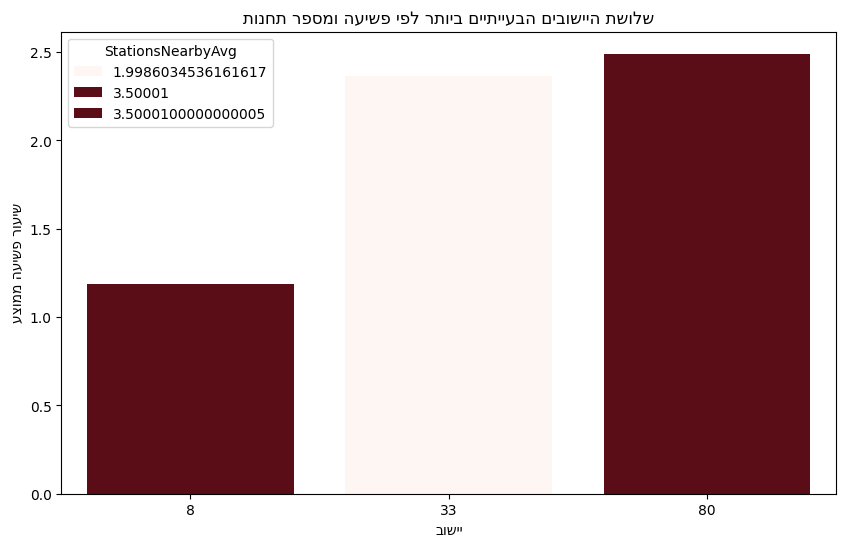

In [25]:
# Reverse Hebrew text for the 'StatisticType' column
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text  # Reverse strings only

# ◊û◊ô◊ï◊ü ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ú◊§◊ô ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î (◊ô◊ï◊®◊ì) ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ (◊¢◊ï◊ú◊î)
sorted_yeshuv_top3 = yeshuv_grouped.sort_values(
    by=['YeshuvCrimeRateAvg', 'StationsNearbyAvg'],
    ascending=[False, True]
).head(3)

# ◊î◊¶◊í◊™ ◊©◊ú◊ï◊©◊™ ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊ë◊¢◊ô◊ô◊™◊ô◊ô◊ù ◊ë◊ô◊ï◊™◊®
print("◊î◊û◊ú◊¶◊î ◊¢◊ú ◊©◊ú◊ï◊©◊™ ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ë◊î◊ù ◊ô◊© ◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊†◊û◊ï◊ö:")
print(sorted_yeshuv_top3)

# ◊í◊®◊£ ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô ◊ú◊î◊¶◊í◊î ◊ë◊®◊ï◊®◊î ◊©◊ú 3 ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊ë◊¢◊ô◊ô◊™◊ô◊ô◊ù ◊ë◊ô◊ï◊™◊®
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sorted_yeshuv_top3['Yeshuv'],
    y=sorted_yeshuv_top3['YeshuvCrimeRateAvg'],
    hue=sorted_yeshuv_top3['StationsNearbyAvg'],
    palette="Reds"
)
plt.title(reverse_hebrew_text("◊©◊ú◊ï◊©◊™ ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊ë◊¢◊ô◊ô◊™◊ô◊ô◊ù ◊ë◊ô◊ï◊™◊® ◊ú◊§◊ô ◊§◊©◊ô◊¢◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™"))
plt.xlabel(reverse_hebrew_text("◊ô◊ô◊©◊ï◊ë"))
plt.ylabel(reverse_hebrew_text("◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊û◊û◊ï◊¶◊¢"))
# plt.legend(reverse_hebrew_text(title="◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊ß◊®◊ï◊ë◊ï◊™"))
plt.show()


◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊î◊í◊ë◊ï◊î ◊ë◊ô◊ï◊™◊® (◊ú◊ú◊ê ◊ß◊©◊® ◊ú◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™):
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
80      80            2.490922           3.500010       4.646094
33      33            2.364671           1.998603       4.761460
8        8            1.184634           3.500010       4.706782
25      25            0.975553           3.000010       4.702239
70      70            0.625726           4.500010       4.627364
57      57            0.617891           4.499673       4.651610
50      50            0.596563           4.500010       4.657544
6        6            0.523885           3.500010       4.687727
24      24            0.487452           3.500246       4.597544
14      14            0.485299           3.502782       4.630808

◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™ ◊î◊†◊û◊ï◊ö ◊ë◊ô◊ï◊™◊®:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
40      40            0.037267           0.0000

<ipython-input-16-ffc4953deed0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


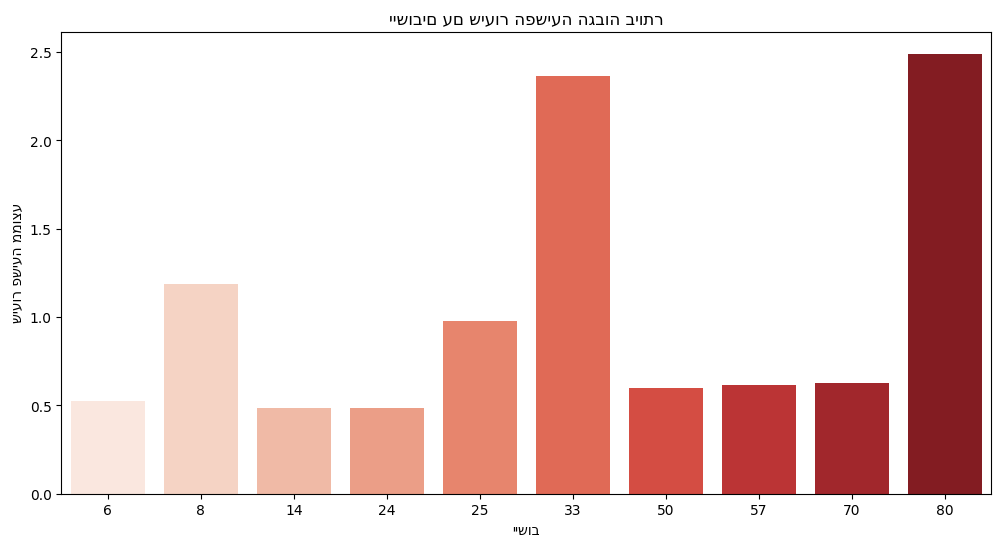

<ipython-input-16-ffc4953deed0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


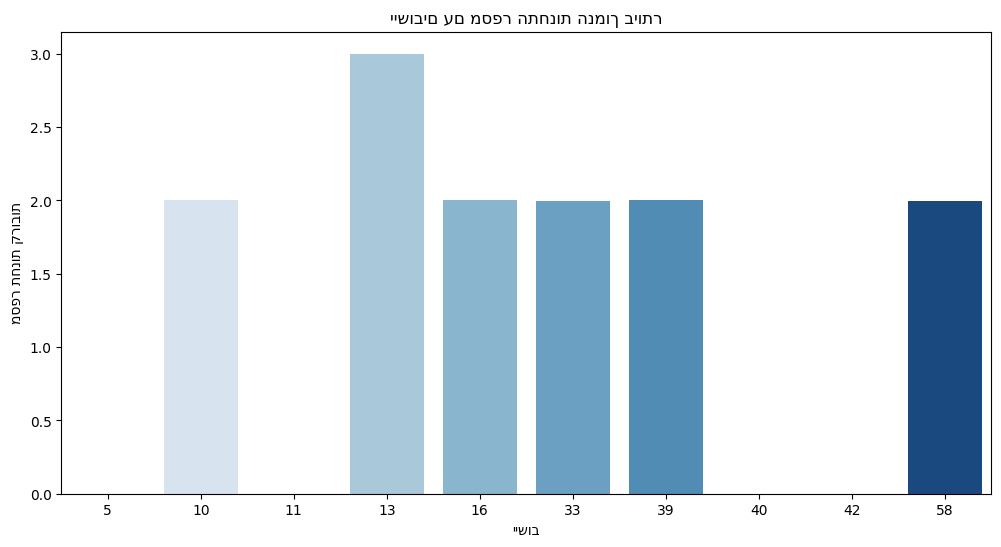

In [ ]:
# ◊î◊©◊ï◊ï◊ê◊™ ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î ◊ú◊ú◊ê ◊ß◊©◊® ◊ú◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™
sorted_by_crime = yeshuv_grouped.sort_values(by="YeshuvCrimeRateAvg", ascending=False).head(10)

# ◊î◊©◊ï◊ï◊ê◊™ ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™ ◊î◊†◊û◊ï◊ö ◊ë◊ô◊ï◊™◊®
sorted_by_stations = yeshuv_grouped.sort_values(by="StationsNearbyAvg", ascending=True).head(10)

# ◊î◊¶◊í◊™ ◊©◊™◊ô ◊î◊®◊©◊ô◊û◊ï◊™
print("◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊î◊í◊ë◊ï◊î ◊ë◊ô◊ï◊™◊® (◊ú◊ú◊ê ◊ß◊©◊® ◊ú◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™):")
print(sorted_by_crime)

print("\n◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™ ◊î◊†◊û◊ï◊ö ◊ë◊ô◊ï◊™◊®:")
print(sorted_by_stations)

# ◊î◊ì◊û◊ô◊î ◊ú◊î◊©◊ï◊ï◊ê◊î - ◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊ë◊ú◊ë◊ì
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_by_crime['Yeshuv'],
    y=sorted_by_crime['YeshuvCrimeRateAvg'],
    palette="Reds"
)
plt.title("◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊î◊í◊ë◊ï◊î ◊ë◊ô◊ï◊™◊®")
plt.xlabel("◊ô◊ô◊©◊ï◊ë")
plt.ylabel("◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊û◊û◊ï◊¶◊¢")
plt.show()

# ◊î◊ì◊û◊ô◊î ◊ú◊î◊©◊ï◊ï◊ê◊î - ◊õ◊û◊ï◊™ ◊™◊ó◊†◊ï◊™ ◊ë◊ú◊ë◊ì
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_by_stations['Yeshuv'],
    y=sorted_by_stations['StationsNearbyAvg'],
    palette="Blues"
)
plt.title("◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™ ◊î◊†◊û◊ï◊ö ◊ë◊ô◊ï◊™◊®")
plt.xlabel("◊ô◊ô◊©◊ï◊ë")
plt.ylabel("◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊ß◊®◊ï◊ë◊ï◊™")
plt.show()

In [ ]:
# ◊ó◊ô◊©◊ï◊ë ◊ô◊ó◊° ◊§◊©◊ô◊¢◊î ◊ú◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™
yeshuv_grouped['CrimeToStationRatio'] = yeshuv_grouped['YeshuvCrimeRateAvg'] / yeshuv_grouped['StationsNearbyAvg']

# ◊û◊ô◊ï◊ü ◊ú◊§◊ô ◊ô◊ó◊° ◊î◊§◊©◊ô◊¢◊î ◊î◊í◊ë◊ï◊î ◊ë◊ô◊ï◊™◊®
high_crime_ratio = yeshuv_grouped.sort_values(by='CrimeToStationRatio', ascending=False).head(10)

# ◊î◊¶◊í◊™ ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊ô◊ó◊° ◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î
print("◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊ô◊ó◊° ◊§◊©◊ô◊¢◊î ◊ú◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊î◊í◊ë◊ï◊î ◊ë◊ô◊ï◊™◊®:")
print(high_crime_ratio)


◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊ô◊ó◊° ◊§◊©◊ô◊¢◊î ◊ú◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊î◊í◊ë◊ï◊î ◊ë◊ô◊ï◊™◊®:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  \
42      42            0.061818           0.000010       4.668359   
11      11            0.052595           0.000010       4.699610   
40      40            0.037267           0.000010       4.701537   
5        5            0.034149           0.000010       4.786579   
33      33            2.364671           1.998603       4.761460   
80      80            2.490922           3.500010       4.646094   
8        8            1.184634           3.500010       4.706782   
25      25            0.975553           3.000010       4.702239   
6        6            0.523885           3.500010       4.687727   
24      24            0.487452           3.500246       4.597544   

    CrimeRateStd  StationsStd  CrimeToStationRatio  
42           0.0     0.000000          6181.813000  
11           0.0     0.000000          5259.514200  
40       

In [ ]:
# ◊û◊ô◊ï◊ü ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊û◊í◊û◊™ ◊§◊©◊ô◊¢◊î ◊¢◊ï◊ú◊î
increasing_trend = yeshuv_grouped.sort_values(by="CrimeTrendAvg", ascending=False).head(10)

# ◊î◊¶◊í◊™ ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ë◊î◊ù ◊û◊í◊û◊™ ◊î◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î◊î
print("◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊û◊í◊û◊™ ◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î◊î:")
print(increasing_trend)


◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊û◊í◊û◊™ ◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î◊î:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  \
68      68            0.056971           4.000010       5.020835   
34      34            0.000845           4.500010       4.947420   
77      77            0.113133           3.500010       4.881712   
58      58            0.000010           1.997920       4.805910   
56      56            0.094946           3.000010       4.794460   
5        5            0.034149           0.000010       4.786579   
7        7            0.075382           3.000010       4.775001   
16      16            0.013233           2.000010       4.763848   
33      33            2.364671           1.998603       4.761460   
13      13            0.022032           3.000010       4.754275   

    CrimeRateStd  StationsStd  CrimeToStationRatio  
68           0.0     0.000000             0.014243  
34           0.0     0.000000             0.000188  
77           0.0     0.000000           

In [ ]:
# ◊ó◊ô◊©◊ï◊ë ◊û◊™◊ê◊ù ◊§◊ô◊®◊°◊ï◊ü
correlation = yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg']].corr()
print("◊û◊™◊ê◊ù ◊ë◊ô◊ü ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊ú◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™:")
print(correlation)


◊û◊™◊ê◊ù ◊ë◊ô◊ü ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊ú◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™:
                    YeshuvCrimeRateAvg  StationsNearbyAvg
YeshuvCrimeRateAvg            1.000000          -0.000893
StationsNearbyAvg            -0.000893           1.000000


◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊©◊¢◊ï◊û◊ì◊ô◊ù ◊ë◊™◊†◊ê◊ô◊ù ◊ú◊ê◊ó◊® ◊©◊ô◊†◊ï◊ô ◊î◊ß◊®◊ô◊ò◊®◊ô◊ï◊†◊ô◊ù:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
23      23            0.310474           3.000010       4.674427
25      25            0.975553           3.000010       4.702239
33      33            2.364671           1.998603       4.761460
52      52            0.239784           3.000010       4.675715


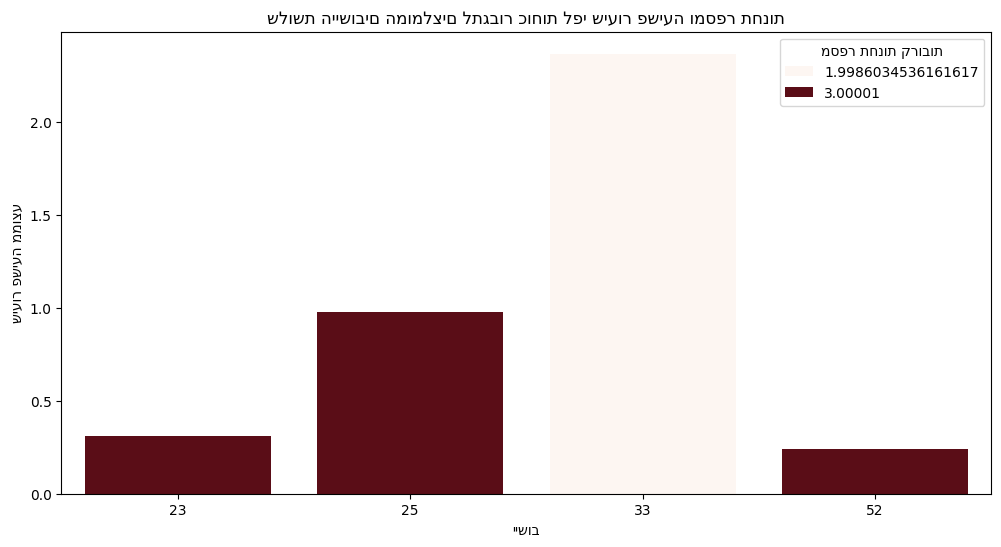


◊û◊°◊ß◊†◊ï◊™ ◊û◊®◊õ◊ñ◊ô◊ï◊™ ◊û◊î◊†◊ô◊™◊ï◊ó:
1. ◊†◊û◊¶◊ê◊ï 3 ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ë◊î◊ù ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î, ◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™ ◊†◊û◊ï◊ö ◊ï◊û◊í◊û◊™ ◊î◊§◊©◊ô◊¢◊î ◊ë◊¢◊ú◊ô◊ô◊î.
2. ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊û◊ï◊ë◊ô◊ú◊ô◊ù ◊ú◊™◊í◊ë◊ï◊® ◊õ◊ï◊ó◊ï◊™ ◊î◊ù ◊ê◊ú◊î ◊ë◊î◊ù ◊ô◊© ◊§◊¢◊® ◊û◊©◊û◊¢◊ï◊™◊ô ◊ë◊ô◊ü ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊ú◊ë◊ô◊ü ◊õ◊û◊ï◊™ ◊î◊™◊ó◊†◊ï◊™ ◊î◊ß◊ô◊ô◊û◊ï◊™.
3. ◊î◊î◊û◊ú◊¶◊î ◊î◊û◊®◊õ◊ñ◊ô◊™ ◊î◊ô◊ê ◊ú◊î◊í◊ì◊ô◊ú ◊ê◊™ ◊§◊®◊ô◊°◊™ ◊î◊™◊ó◊†◊ï◊™ ◊ê◊ï ◊ú◊™◊í◊ë◊® ◊ë◊†◊ï◊õ◊ó◊ï◊™ ◊û◊©◊ò◊®◊™◊ô◊™ ◊ë◊ê◊ñ◊ï◊®◊ô◊ù ◊ê◊ú◊ï.
4. ◊î◊û◊í◊û◊ï◊™ ◊û◊®◊ê◊ï◊™ ◊õ◊ô ◊ë◊ê◊ñ◊ï◊®◊ô◊ù ◊ë◊î◊ù ◊û◊í◊û◊™ ◊î◊§◊©◊ô◊¢◊î ◊¢◊ï◊ú◊î, ◊ó◊ô◊ñ◊ï◊ß ◊î◊†◊ï◊õ◊ó◊ï◊™ ◊î◊û◊©◊ò◊®◊™◊ô◊™ ◊¢◊©◊ï◊ô ◊ú◊î◊ô◊ï◊™ ◊ó◊ô◊ï◊†◊ô ◊ë◊û◊†◊ô◊¢◊™ ◊î◊ó◊®◊§◊î.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ◊î◊†◊ó◊™ ◊¢◊ë◊ï◊ì◊î: ◊î◊†◊™◊ï◊†◊ô◊ù ◊†◊ò◊¢◊†◊ï ◊ï◊†◊ï◊®◊û◊ú◊ï ◊û◊®◊ê◊© ◊ë◊û◊©◊™◊†◊î 'combined_df'

# ◊©◊ú◊ë 1: ◊ß◊ô◊ë◊ï◊• ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú◊§◊ô ◊ô◊ô◊©◊ï◊ë ◊¢◊ù ◊ó◊ô◊©◊ï◊ë ◊î◊û◊û◊ï◊¶◊¢◊ô◊ù
yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
    YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
    StationsNearbyAvg=('StationsNearbyCount', 'mean'),
    CrimeTrendAvg=('CrimeTrend', 'mean')
).reset_index()

# ◊©◊ú◊ë 2: ◊ß◊ë◊ô◊¢◊™ ◊ß◊®◊ô◊ò◊®◊ô◊ï◊†◊ô◊ù ◊ú◊î◊û◊ú◊¶◊î - ◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î◊î, ◊™◊ó◊†◊ï◊™ ◊†◊û◊ï◊õ◊ï◊™ ◊ï◊û◊í◊û◊î ◊¢◊ï◊ú◊î
# ◊î◊í◊ì◊®◊™ ◊°◊§◊ô◊ù
# ◊©◊ô◊û◊ï◊© ◊ë◊û◊û◊ï◊¶◊¢ ◊ë◊û◊ß◊ï◊ù ◊ê◊ó◊ï◊ñ◊ï◊†◊ô◊ù
high_crime_threshold = yeshuv_grouped['YeshuvCrimeRateAvg'].mean()
low_station_threshold = yeshuv_grouped['StationsNearbyAvg'].mean()
high_trend_threshold = yeshuv_grouped['CrimeTrendAvg'].mean()


# ◊°◊ô◊†◊ï◊ü ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊©◊¢◊ï◊†◊ô◊ù ◊¢◊ú ◊î◊ß◊®◊ô◊ò◊®◊ô◊ï◊†◊ô◊ù
recommended_yeshuvs = yeshuv_grouped[
    (yeshuv_grouped['YeshuvCrimeRateAvg'] > high_crime_threshold) &
    (yeshuv_grouped['StationsNearbyAvg'] < low_station_threshold) &
    (yeshuv_grouped['CrimeTrendAvg'] > high_trend_threshold)
]

# # ◊©◊ú◊ë 3: ◊î◊¶◊í◊™ 3 ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊û◊ï◊ë◊ô◊ú◊ô◊ù ◊¢◊ù ◊¶◊ï◊®◊ö ◊ë◊™◊í◊ë◊ï◊® ◊õ◊ï◊ó◊ï◊™
# top_3_recommendations = recommended_yeshuvs.sort_values(
#     by=['YeshuvCrimeRateAvg', 'CrimeTrendAvg'], ascending=[False, False]
# ).head(3)

# # ◊î◊¶◊í◊™ ◊î◊ò◊ë◊ú◊î
# print("‚úÖ ◊ò◊ë◊ú◊™ ◊î◊î◊û◊ú◊¶◊ï◊™: 3 ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊û◊ï◊ë◊ô◊ú◊ô◊ù ◊¢◊ù ◊¶◊ï◊®◊ö ◊ë◊™◊í◊ë◊ï◊® ◊õ◊ï◊ó◊ï◊™:")
# print(top_3_recommendations)

# ◊î◊¶◊í◊™ ◊õ◊ú ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊©◊¢◊ï◊û◊ì◊ô◊ù ◊ë◊™◊†◊ê◊ô ◊î◊°◊£ ◊ë◊û◊ß◊ï◊ù ◊®◊ß ◊©◊ú◊ï◊©◊î
recommended_yeshuvs = yeshuv_grouped[
    (yeshuv_grouped['YeshuvCrimeRateAvg'] > high_crime_threshold) &
    (yeshuv_grouped['StationsNearbyAvg'] < low_station_threshold) &
    (yeshuv_grouped['CrimeTrendAvg'] > high_trend_threshold)
]
print("◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊©◊¢◊ï◊û◊ì◊ô◊ù ◊ë◊™◊†◊ê◊ô◊ù ◊ú◊ê◊ó◊® ◊©◊ô◊†◊ï◊ô ◊î◊ß◊®◊ô◊ò◊®◊ô◊ï◊†◊ô◊ù:")
print(recommended_yeshuvs)


# ◊©◊ú◊ë 4: ◊î◊ì◊û◊ô◊î - ◊í◊®◊£ ◊¢◊û◊ï◊ì◊ï◊™ ◊î◊û◊¶◊ô◊í ◊ê◊™ ◊î◊ß◊©◊® ◊ë◊ô◊ü ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊ï◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™
plt.figure(figsize=(12, 6))
sns.barplot(
    x=recommended_yeshuvs['Yeshuv'],
    y=recommended_yeshuvs['YeshuvCrimeRateAvg'],
    hue=recommended_yeshuvs['StationsNearbyAvg'],
    palette="Reds"
)
plt.title("◊©◊ú◊ï◊©◊™ ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊û◊ï◊û◊ú◊¶◊ô◊ù ◊ú◊™◊í◊ë◊ï◊® ◊õ◊ï◊ó◊ï◊™ ◊ú◊§◊ô ◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™")
plt.xlabel("◊ô◊ô◊©◊ï◊ë")
plt.ylabel("◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊û◊û◊ï◊¶◊¢")
plt.legend(title="◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊ß◊®◊ï◊ë◊ï◊™")
plt.show()

# ◊©◊ú◊ë 5: ◊û◊°◊ß◊†◊ï◊™ ◊û◊ï◊¶◊¢◊ï◊™ ◊ú◊î◊¶◊í◊î ◊ë◊¢◊ë◊ï◊ì◊î
conclusion_text = """
◊û◊°◊ß◊†◊ï◊™ ◊û◊®◊õ◊ñ◊ô◊ï◊™ ◊û◊î◊†◊ô◊™◊ï◊ó:
1. ◊†◊û◊¶◊ê◊ï 3 ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ë◊î◊ù ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊í◊ë◊ï◊î, ◊û◊°◊§◊® ◊î◊™◊ó◊†◊ï◊™ ◊†◊û◊ï◊ö ◊ï◊û◊í◊û◊™ ◊î◊§◊©◊ô◊¢◊î ◊ë◊¢◊ú◊ô◊ô◊î.
2. ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊î◊û◊ï◊ë◊ô◊ú◊ô◊ù ◊ú◊™◊í◊ë◊ï◊® ◊õ◊ï◊ó◊ï◊™ ◊î◊ù ◊ê◊ú◊î ◊ë◊î◊ù ◊ô◊© ◊§◊¢◊® ◊û◊©◊û◊¢◊ï◊™◊ô ◊ë◊ô◊ü ◊©◊ô◊¢◊ï◊® ◊î◊§◊©◊ô◊¢◊î ◊ú◊ë◊ô◊ü ◊õ◊û◊ï◊™ ◊î◊™◊ó◊†◊ï◊™ ◊î◊ß◊ô◊ô◊û◊ï◊™.
3. ◊î◊î◊û◊ú◊¶◊î ◊î◊û◊®◊õ◊ñ◊ô◊™ ◊î◊ô◊ê ◊ú◊î◊í◊ì◊ô◊ú ◊ê◊™ ◊§◊®◊ô◊°◊™ ◊î◊™◊ó◊†◊ï◊™ ◊ê◊ï ◊ú◊™◊í◊ë◊® ◊ë◊†◊ï◊õ◊ó◊ï◊™ ◊û◊©◊ò◊®◊™◊ô◊™ ◊ë◊ê◊ñ◊ï◊®◊ô◊ù ◊ê◊ú◊ï.
4. ◊î◊û◊í◊û◊ï◊™ ◊û◊®◊ê◊ï◊™ ◊õ◊ô ◊ë◊ê◊ñ◊ï◊®◊ô◊ù ◊ë◊î◊ù ◊û◊í◊û◊™ ◊î◊§◊©◊ô◊¢◊î ◊¢◊ï◊ú◊î, ◊ó◊ô◊ñ◊ï◊ß ◊î◊†◊ï◊õ◊ó◊ï◊™ ◊î◊û◊©◊ò◊®◊™◊ô◊™ ◊¢◊©◊ï◊ô ◊ú◊î◊ô◊ï◊™ ◊ó◊ô◊ï◊†◊ô ◊ë◊û◊†◊ô◊¢◊™ ◊î◊ó◊®◊§◊î.
"""
print(conclusion_text)



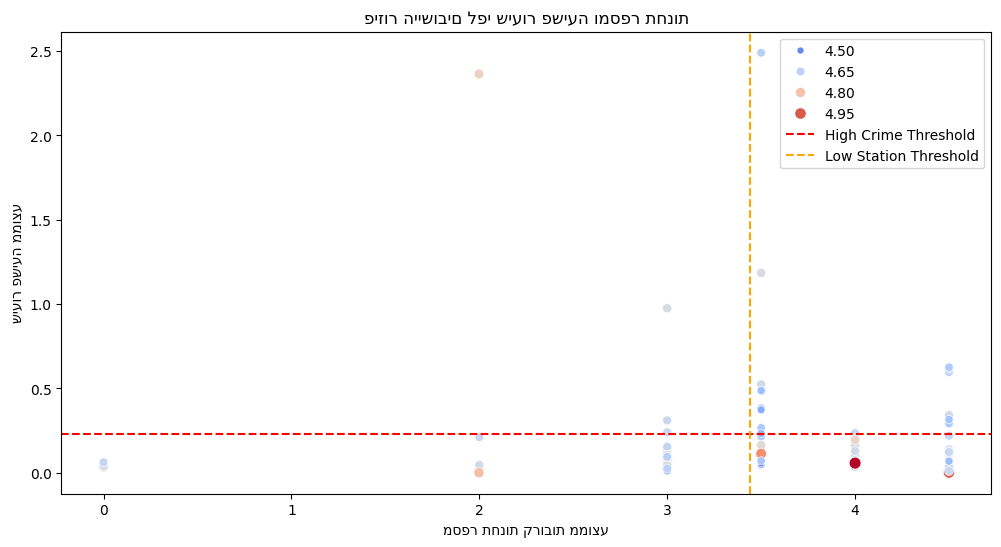

In [ ]:
# ◊í◊®◊£ ◊§◊ô◊ñ◊ï◊® ◊î◊û◊¶◊ô◊í ◊ê◊™ ◊õ◊ú ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ë◊ô◊ó◊° ◊ú◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['CrimeTrendAvg'],
    size=yeshuv_grouped['CrimeTrendAvg'],
    palette="coolwarm"
)
plt.axhline(high_crime_threshold, color='red', linestyle='--', label='High Crime Threshold')
plt.axvline(low_station_threshold, color='orange', linestyle='--', label='Low Station Threshold')
plt.title("◊§◊ô◊ñ◊ï◊® ◊î◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ú◊§◊ô ◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™")
plt.xlabel("◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊ß◊®◊ï◊ë◊ï◊™ ◊û◊û◊ï◊¶◊¢")
plt.ylabel("◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊û◊û◊ï◊¶◊¢")
plt.legend()
plt.show()


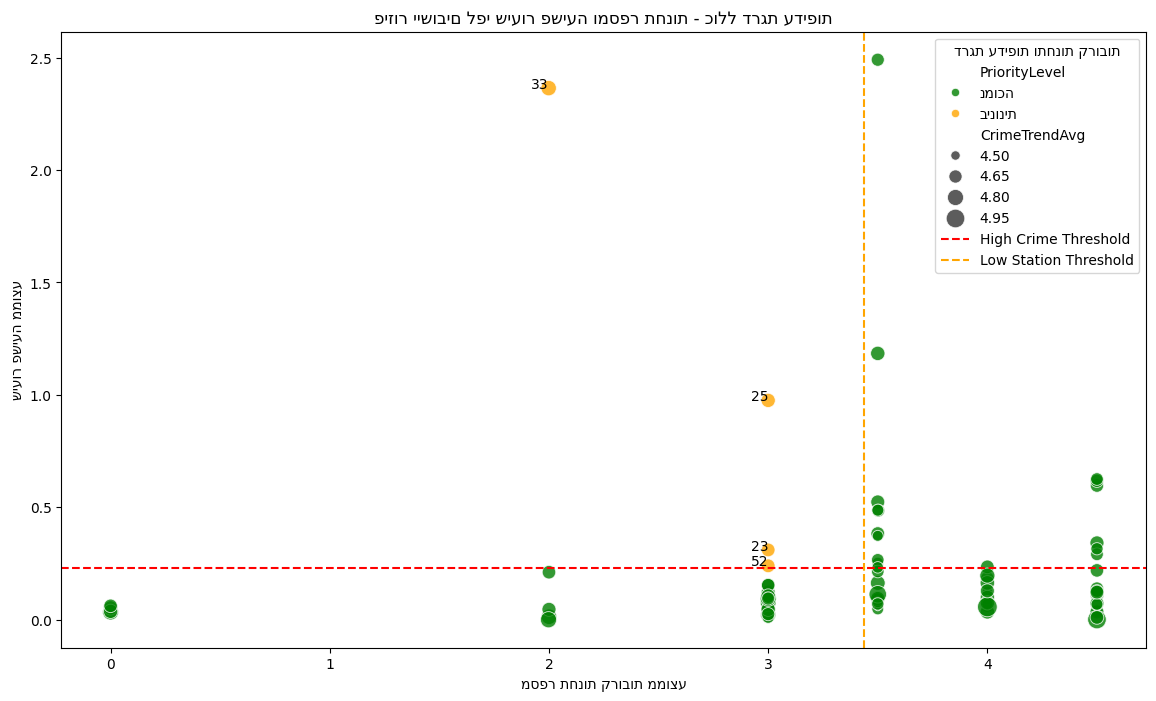

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ◊ô◊¶◊ô◊®◊™ ◊¢◊ï◊™◊ß ◊û◊î◊†◊™◊ï◊†◊ô◊ù ◊¢◊ù ◊ì◊ô◊®◊ï◊í ◊¢◊ì◊ô◊§◊ï◊™ ◊¢◊ú ◊°◊û◊ö ◊î◊ß◊®◊ô◊ò◊®◊ô◊ï◊†◊ô◊ù
yeshuv_grouped['PriorityLevel'] = '◊†◊û◊ï◊õ◊î'
yeshuv_grouped.loc[
    (yeshuv_grouped['YeshuvCrimeRateAvg'] > high_crime_threshold) &
    (yeshuv_grouped['StationsNearbyAvg'] < low_station_threshold) &
    (yeshuv_grouped['CrimeTrendAvg'] > high_trend_threshold),
    'PriorityLevel'
] = '◊í◊ë◊ï◊î◊î'

yeshuv_grouped.loc[
    (yeshuv_grouped['YeshuvCrimeRateAvg'] > high_crime_threshold) &
    (yeshuv_grouped['StationsNearbyAvg'] < low_station_threshold),
    'PriorityLevel'
] = '◊ë◊ô◊†◊ï◊†◊ô◊™'

# ◊û◊ô◊§◊ï◊ô ◊¶◊ë◊¢◊ô◊ù ◊ú◊§◊ô ◊ì◊®◊í◊™ ◊¢◊ì◊ô◊§◊ï◊™
priority_colors = {
    '◊í◊ë◊ï◊î◊î': 'red',
    '◊ë◊ô◊†◊ï◊†◊ô◊™': 'orange',
    '◊†◊û◊ï◊õ◊î': 'green'
}

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊§◊ô◊ñ◊ï◊® ◊¢◊ù ◊¶◊ë◊¢◊ô◊ù ◊ú◊§◊ô ◊ì◊®◊í◊™ ◊¢◊ì◊ô◊§◊ï◊™
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['PriorityLevel'],
    size=yeshuv_grouped['CrimeTrendAvg'],
    sizes=(20, 200),
    palette=priority_colors,
    alpha=0.8
)

# ◊î◊ï◊°◊§◊™ ◊ß◊ï◊ï◊ô ◊î◊°◊£
plt.axhline(high_crime_threshold, color='red', linestyle='--', label='High Crime Threshold')
plt.axvline(low_station_threshold, color='orange', linestyle='--', label='Low Station Threshold')

# ◊î◊ï◊°◊§◊™ ◊™◊ï◊ï◊ô◊ï◊™ ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ú ◊î◊†◊ß◊ï◊ì◊ï◊™
for index, row in yeshuv_grouped.iterrows():
    if row['PriorityLevel'] in ['◊í◊ë◊ï◊î◊î', '◊ë◊ô◊†◊ï◊†◊ô◊™']:  # ◊®◊ß ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊¢◊ù ◊¢◊ì◊ô◊§◊ï◊™ ◊í◊ë◊ï◊î◊î/◊ë◊ô◊†◊ï◊†◊ô◊™
        plt.text(row['StationsNearbyAvg'], row['YeshuvCrimeRateAvg'], str(row['Yeshuv']),
                 fontsize=10, ha='right')

# ◊õ◊ï◊™◊®◊ï◊™ ◊ï◊§◊®◊ò◊ô◊ù ◊†◊ï◊°◊§◊ô◊ù
plt.title("◊§◊ô◊ñ◊ï◊® ◊ô◊ô◊©◊ï◊ë◊ô◊ù ◊ú◊§◊ô ◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊ï◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ - ◊õ◊ï◊ú◊ú ◊ì◊®◊í◊™ ◊¢◊ì◊ô◊§◊ï◊™")
plt.xlabel("◊û◊°◊§◊® ◊™◊ó◊†◊ï◊™ ◊ß◊®◊ï◊ë◊ï◊™ ◊û◊û◊ï◊¶◊¢")
plt.ylabel("◊©◊ô◊¢◊ï◊® ◊§◊©◊ô◊¢◊î ◊û◊û◊ï◊¶◊¢")
plt.legend(title="◊ì◊®◊í◊™ ◊¢◊ì◊ô◊§◊ï◊™ ◊ï◊™◊ó◊†◊ï◊™ ◊ß◊®◊ï◊ë◊ï◊™")
plt.show()


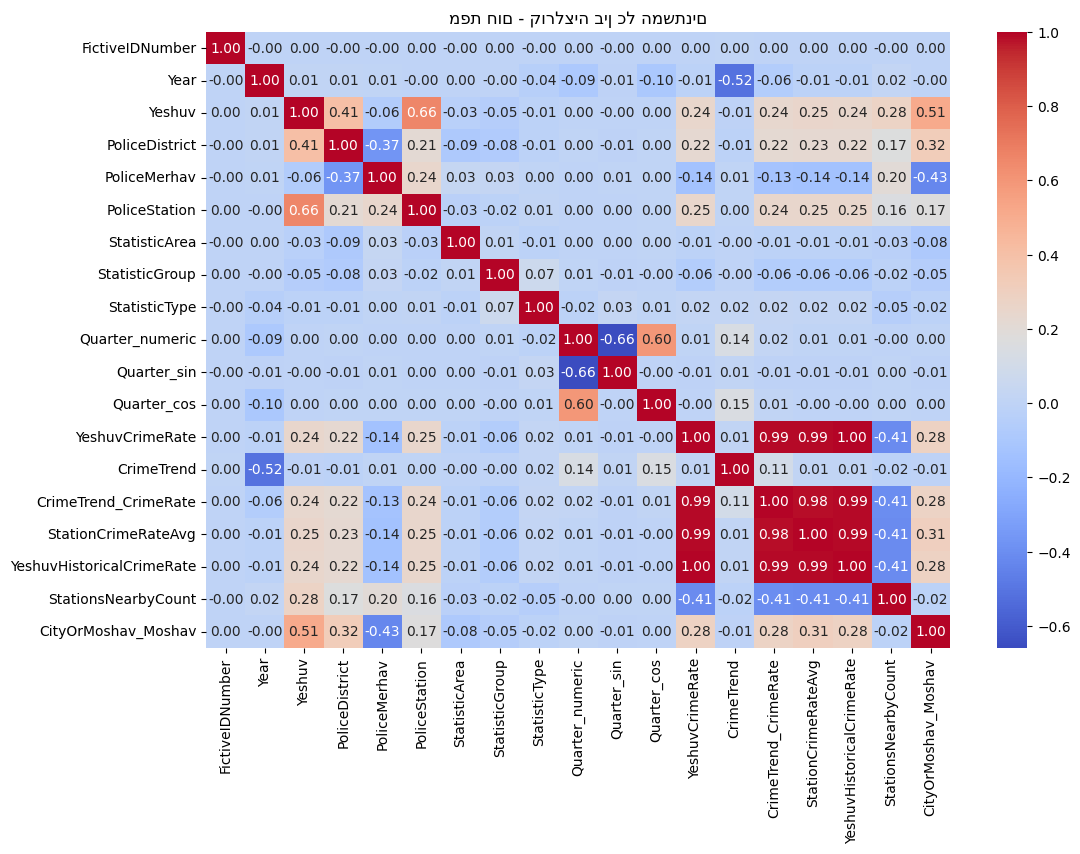

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# # ◊ß◊ô◊ë◊ï◊• ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú◊§◊ô ◊ô◊ô◊©◊ï◊ë ◊ï◊ó◊ô◊©◊ï◊ë ◊û◊û◊ï◊¶◊¢◊ô◊ù
# yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
#     YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
#     StationsNearbyAvg=('StationsNearbyCount', 'mean'),
#     CrimeTrendAvg=('CrimeTrend', 'mean')
# ).reset_index()

# ◊ó◊ô◊©◊ï◊ë ◊û◊ò◊®◊ô◊¶◊™ ◊î◊ß◊ï◊®◊ú◊¶◊ô◊î ◊¢◊ë◊ï◊® ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù ◊î◊û◊°◊§◊®◊ô◊ô◊ù
correlation_matrix = combined_df.corr()

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ Heatmap ◊ú◊î◊¶◊í◊™ ◊î◊ß◊ï◊®◊ú◊¶◊ô◊ï◊™
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("◊û◊§◊™ ◊ó◊ï◊ù - ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊ë◊ô◊ü ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù")
plt.show()


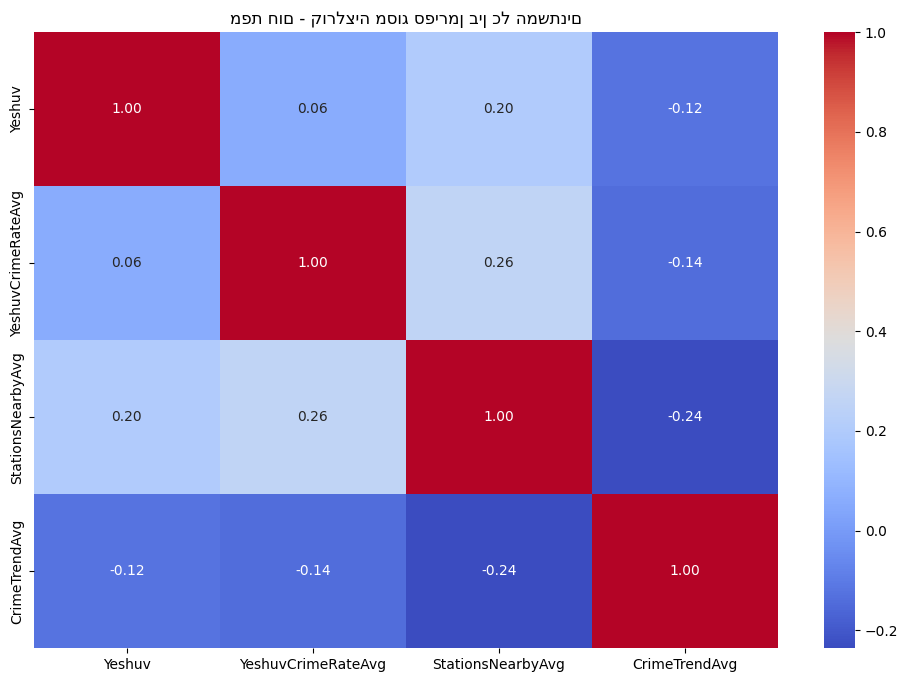

◊û◊ò◊®◊ô◊¶◊™ ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊°◊§◊ô◊®◊û◊ü:
                      Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  \
Yeshuv              1.000000            0.061264           0.201748   
YeshuvCrimeRateAvg  0.061264            1.000000           0.258551   
StationsNearbyAvg   0.201748            0.258551           1.000000   
CrimeTrendAvg      -0.123910           -0.141194          -0.236372   

                    CrimeTrendAvg  
Yeshuv                  -0.123910  
YeshuvCrimeRateAvg      -0.141194  
StationsNearbyAvg       -0.236372  
CrimeTrendAvg            1.000000  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ◊ß◊ô◊ë◊ï◊• ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú◊§◊ô ◊ô◊ô◊©◊ï◊ë ◊ï◊ó◊ô◊©◊ï◊ë ◊û◊û◊ï◊¶◊¢◊ô◊ù
yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
    YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
    StationsNearbyAvg=('StationsNearbyCount', 'mean'),
    CrimeTrendAvg=('CrimeTrend', 'mean')
).reset_index()

# ◊ó◊ô◊©◊ï◊ë ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊û◊°◊ï◊í ◊°◊§◊ô◊®◊û◊ü
spearman_correlation = yeshuv_grouped.corr(method='spearman')

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ Heatmap ◊ú◊î◊¶◊í◊™ ◊î◊ß◊ï◊®◊ú◊¶◊ô◊ï◊™
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("◊û◊§◊™ ◊ó◊ï◊ù - ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊û◊°◊ï◊í ◊°◊§◊ô◊®◊û◊ü ◊ë◊ô◊ü ◊õ◊ú ◊î◊û◊©◊™◊†◊ô◊ù")
plt.show()

# ◊î◊¶◊í◊™ ◊î◊û◊ò◊®◊ô◊¶◊î ◊î◊û◊ï◊ì◊§◊°◊™ ◊¢◊¶◊û◊î
print("◊û◊ò◊®◊ô◊¶◊™ ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊°◊§◊ô◊®◊û◊ü:")
print(spearman_correlation)


                            OLS Regression Results                            
Dep. Variable:     YeshuvCrimeRateAvg   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.03217
Date:                Sun, 12 Jan 2025   Prob (F-statistic):              0.968
Time:                        15:18:59   Log-Likelihood:                -41.705
No. Observations:                  82   AIC:                             89.41
Df Residuals:                      79   BIC:                             96.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3882      2.45

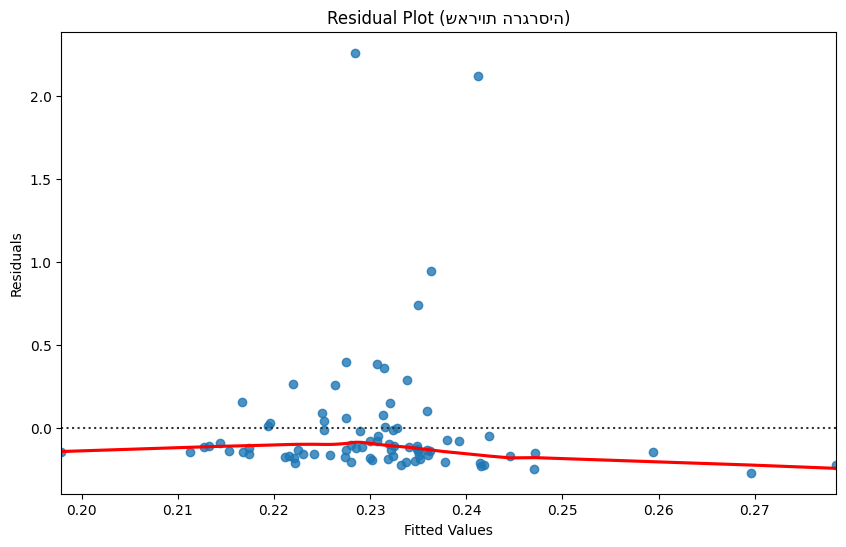

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns



# ◊û◊©◊™◊†◊î ◊î◊û◊ò◊®◊î (Target)
y = yeshuv_grouped['YeshuvCrimeRateAvg']

# ◊û◊©◊™◊†◊ô ◊î◊î◊°◊ë◊® (Features)
X = yeshuv_grouped[['StationsNearbyAvg', 'CrimeTrendAvg']]

# ◊î◊ï◊°◊§◊™ ◊ß◊ë◊ï◊¢ (intercept) ◊ú◊®◊í◊®◊°◊ô◊î
X = sm.add_constant(X)

# ◊î◊™◊ê◊û◊™ ◊û◊ï◊ì◊ú ◊®◊í◊®◊°◊ô◊î ◊ú◊ô◊†◊ê◊®◊ô◊™ ◊û◊®◊ï◊ë◊î
model = sm.OLS(y, X).fit()

# ◊î◊¶◊í◊™ ◊°◊ô◊õ◊ï◊ù ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊î◊°◊ò◊ò◊ô◊°◊ò◊ô◊ï◊™
print(model.summary())

# ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î - ◊™◊®◊©◊ô◊ù ◊©◊ê◊®◊ô◊ï◊™ ◊ú◊ë◊ì◊ô◊ß◊î
plt.figure(figsize=(10,6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={"color": "red"})
plt.title('Residual Plot (◊©◊ê◊®◊ô◊ï◊™ ◊î◊®◊í◊®◊°◊ô◊î)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
